# Практическая работа №2 
#### Город: *Шанхай*  
#### Автор: *Рената Зигангирова*
## Часть 1

In [2]:
import rasterio.mask
import rasterio
from pyproj import Transformer
import osmnx as ox
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from rasterio.enums import Resampling

In [3]:
def get_subarray_coords_rio (arr_shape, src, trs, dest_crs = 4326):
    height = arr_shape[0]
    width = arr_shape[1]

    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(trs, rows, cols)

    xs = np.array(xs)
    ys = np.array(ys)

    trs_wgs = Transformer.from_crs (src.crs, dest_crs)
    lats, lons = trs_wgs.transform(xs,ys)
    return lats, lons

def LCZ_colormap ():
    lcz_colors = np.array ([
                 [140, 0,   0],
                 [209, 0,   0], 
                 [254, 0,   0],
                 [190, 77,  0],
                 [255, 102, 0],
                 [254, 153, 87],
                 [230, 217, 4],
                 [187, 187, 187],
                 [254, 204, 171],
                 [85,  85,  85],
                 [0,   105, 0],
                 [0,   170, 0],
                 [99,  133, 38],
                 [185, 221, 119],
                 [0,   0,   0],
                 [251, 246, 174],
                 [106, 106, 255]]) / 255
    
    return mcolors.LinearSegmentedColormap.from_list ('', lcz_colors, 17)


#### Запрос полигона для выбраной территории из OSM

In [4]:
place_name = "Shanghai, China"
area = ox.geocode_to_gdf(place_name)

#### Визуализируем данные построенные по нашим эталонам ЛКЗ

In [9]:
data_path = '/home/babykelp/Documents/climate/b9ae03d3e7d5b807cfc2f64d8d24915bd2c14a90/b9ae03d3e7d5b807cfc2f64d8d24915bd2c14a90.tif'

src_data = rasterio.open (data_path)
subarray_data, transform_data = rasterio.mask.mask(src_data, area['geometry'], crop=True, filled=False)
lats_data, lons_data = get_subarray_coords_rio (subarray_data.shape[subarray_data.ndim-2:], src_data, transform_data)

display(subarray_data.shape)

data2draw_new = subarray_data[1,:,:].astype(float)

(3, 614, 850)

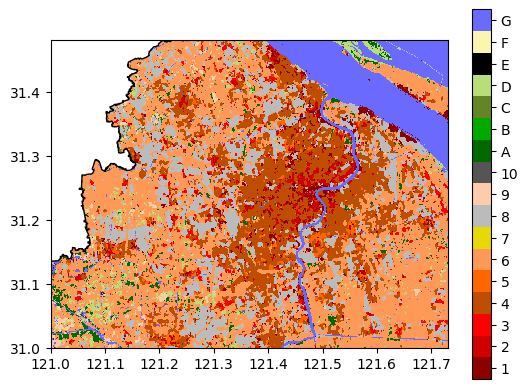

In [10]:
plt.figure()
plt.pcolormesh(lats_data, lons_data, data2draw_new, shading='nearest', cmap=LCZ_colormap())
area.plot(ax = plt.gca(), edgecolor = 'black', facecolor = [0, 0, 0, 0])
plt.clim([0.5, 17.5])
cb = plt.colorbar (ticks = range (1,18))
cb.ax.set_yticklabels ([1,2,3,4,5,6,7,8,9,10,'A','B','C','D','E','F','G'])
plt.xlim(121,121.73)
plt.ylim(31,31.48)
plt.show()

### Сравниваем с эталоном
[(Demuzere et al., 2022)](https://essd.copernicus.org/articles/14/3835/2022/) для всего мира обрезанную по Шанхаю.

In [11]:
data_path_etalon = 'lcz_filter_v3.tif'

src = rasterio.open (data_path_etalon)
subarray, transform = rasterio.mask.mask(src, area['geometry'], crop=True, filled=False)
lats, lons = get_subarray_coords_rio (subarray.shape[subarray.ndim-2:], src, transform)

display(subarray.shape)

data2draw = subarray[0,:,:].astype(float)

(1, 3089, 5271)

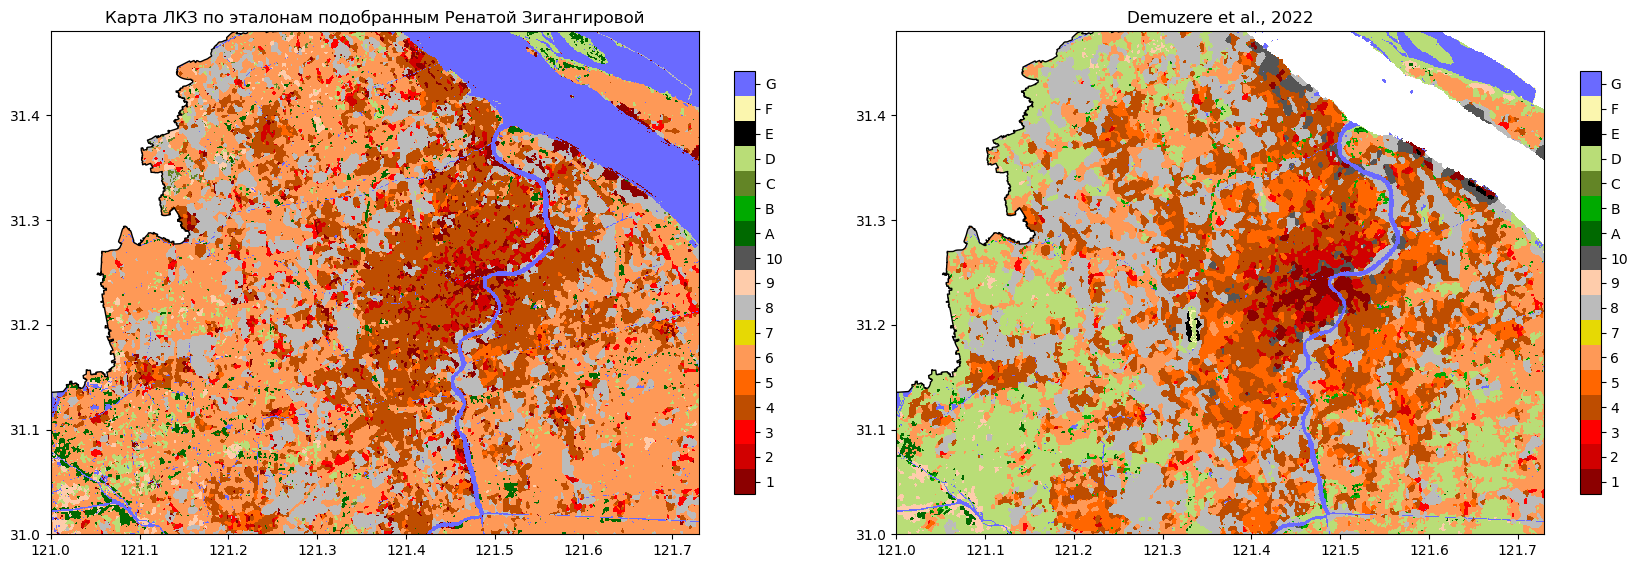

In [44]:
fig, axes = plt.subplots(1,2, figsize=(20, 10))
pc0 = axes[0].pcolormesh(lats_data, lons_data, data2draw_new, shading='nearest', cmap=LCZ_colormap())
area.plot(ax = axes[0], edgecolor = 'black', facecolor = [0, 0, 0, 0])
axes[0].set_title('Карта ЛКЗ по эталонам подобранным Ренатой Зигангировой')
axes[0].set_xlim(121,121.73)
axes[0].set_ylim(31,31.48)

pc1 = axes[1].pcolormesh(lats, lons, data2draw, shading='nearest', cmap=LCZ_colormap())
area.plot(ax = axes[1], edgecolor = 'black', facecolor = [0, 0, 0, 0])
axes[1].set_title('Demuzere et al., 2022')
axes[1].set_xlim(121,121.73)
axes[1].set_ylim(31,31.48)

pc0.set_clim(0.5, 17.5)
pc1.set_clim(0.5, 17.5)

cbar = fig.colorbar(pc1, ax=axes[1], orientation='vertical', pad=0.05, fraction=0.03)
cbar.set_ticks(np.arange(1, 18))
cbar.set_ticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'A', 'B', 'C', 'D', 'E', 'F', 'G'])

cbar = fig.colorbar(pc1, ax=axes[0], orientation='vertical', pad=0.05, fraction=0.03)
cbar.set_ticks(np.arange(1, 18))
cbar.set_ticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'A', 'B', 'C', 'D', 'E', 'F', 'G'])

plt.show()

## Часть 2

Пробуем скачать данные OSM, получаем какую-то печальную картину

In [12]:
tags = {'landuse': True}   
landuse = ox.features_from_place(place_name, tags)

/home/babykelp/miniforge3/envs/we_wear_pink/lib/python3.12/site-packages/osmnx/_overpass.py:211: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


/home/babykelp/miniforge3/envs/we_wear_pink/lib/python3.12/site-packages/osmnx/_overpass.py:211: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


(31.0, 31.48)

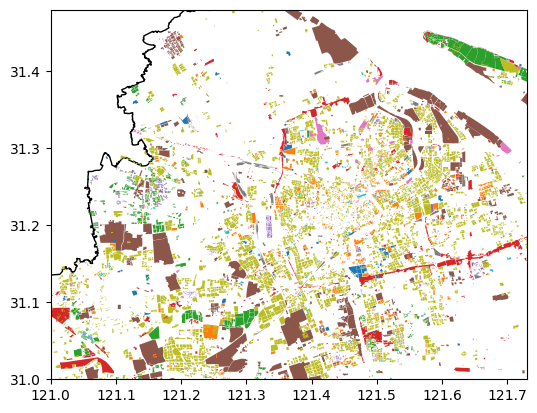

In [6]:
ax = area.plot(facecolor = [0, 0, 0, 0], edgecolor = 'black')
landuse[landuse.type == 'Polygon'].plot(ax = ax, column = 'landuse')
plt.xlim(121,121.73)
plt.ylim(31,31.48)

Скачиваем WorldCover Sentinel и получаем более приятную картину

In [16]:
from rasterio.enums import Resampling

Это функция должна уменьшат разрешение чтобы можно было открыть этот сентинелевский тифф

In [27]:
sentinel_path = '/home/babykelp/Documents/climate/terrascope_download_20240224_234046/WORLDCOVER/ESA_WORLDCOVER_10M_2021_V200/MAP/ESA_WorldCover_10m_2021_v200_N30E120_Map/ESA_WorldCover_10m_2021_v200_N30E120_Map.tif'


with rasterio.open(sentinel_path) as src:

    #Можно поменять downsample_factor чтобы уменьшить разрешение
    downsample_factor = 8
    out_shape = (
        src.count,
        int(src.height / downsample_factor),
        int(src.width / downsample_factor)
    )

    transform = src.transform * src.transform.scale(
        (src.width / out_shape[-1]),
        (src.height / out_shape[-2])
    )

    data = src.read(
        out_shape=out_shape,
        resampling=Resampling.bilinear
    )

lats_sent, lons_sent = get_subarray_coords_rio(data.shape[data.ndim-2:], src, transform)

display(data.shape)
data_sentinel = data[0,:,:].astype(float)


(1, 4500, 4500)

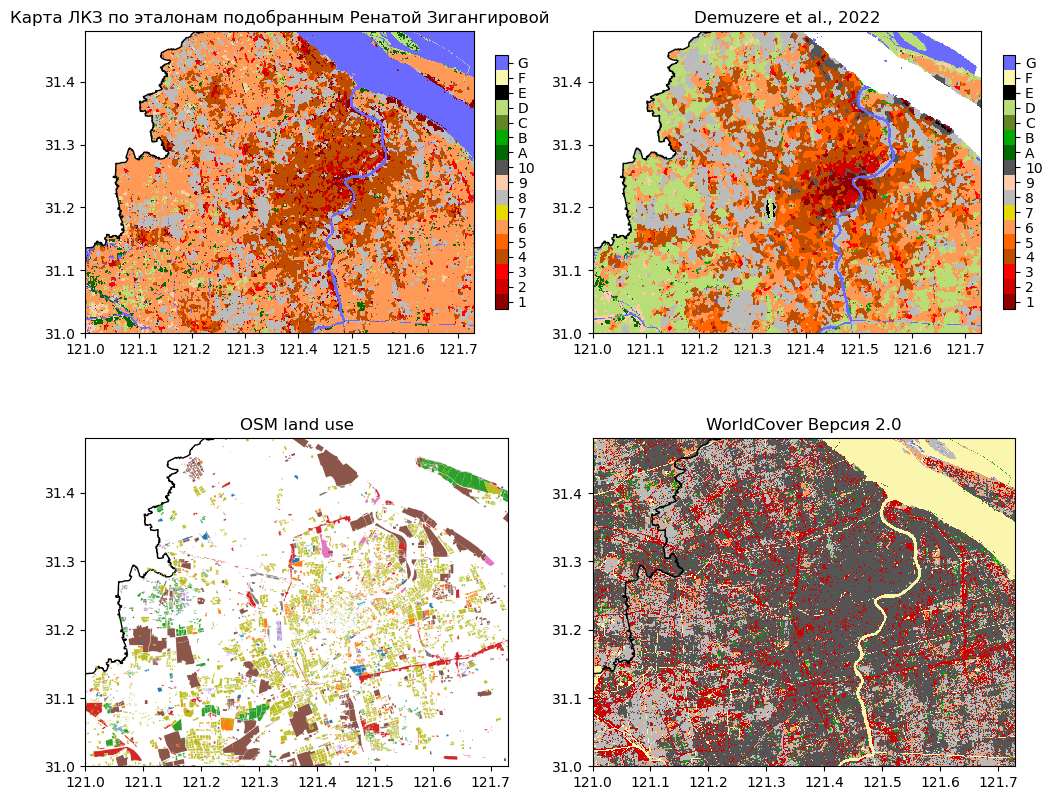

In [29]:
fig, axes = plt.subplots(2,2, figsize=(12, 10))

pc0 = axes[0, 0].pcolormesh(lats_data, lons_data, data2draw_new, shading='nearest', cmap=LCZ_colormap())
area.plot(ax = axes[0, 0], edgecolor = 'black', facecolor = [0, 0, 0, 0])
axes[0, 0].set_title('Карта ЛКЗ по эталонам подобранным Ренатой Зигангировой')
axes[0, 0].set_xlim(121,121.73)
axes[0, 0].set_ylim(31,31.48)

pc1 = axes[0,1].pcolormesh(lats, lons, data2draw, shading='nearest', cmap=LCZ_colormap())
area.plot(ax = axes[0,1], edgecolor = 'black', facecolor = [0, 0, 0, 0])
axes[0,1].set_title('Demuzere et al., 2022')
axes[0,1].set_xlim(121,121.73)
axes[0,1].set_ylim(31,31.48)

pc0.set_clim(0.5, 17.5)
pc1.set_clim(0.5, 17.5)

cbar = fig.colorbar(pc1, ax=axes[0,0], orientation='vertical', pad=0.05, fraction=0.03)
cbar.set_ticks(np.arange(1, 18))
cbar.set_ticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'A', 'B', 'C', 'D', 'E', 'F', 'G'])

cbar = fig.colorbar(pc1, ax=axes[0,1], orientation='vertical', pad=0.05, fraction=0.03)
cbar.set_ticks(np.arange(1, 18))
cbar.set_ticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'A', 'B', 'C', 'D', 'E', 'F', 'G'])

area.plot(ax = axes[1,0],facecolor = [0, 0, 0, 0], edgecolor = 'black')
landuse[landuse.type == 'Polygon'].plot(ax = axes[1,0], column = 'landuse')
axes[1,0].set_title('OSM land use')
axes[1,0].set_xlim(121,121.73)
axes[1,0].set_ylim(31,31.48)

pc3 = axes[1,1].pcolormesh(lats_sent, lons_sent, data_sentinel, cmap=LCZ_colormap())
area.plot(ax = axes[1,1], edgecolor = 'black', facecolor = [0, 0, 0, 0])
axes[1,1].set_title('WorldCover Версия 2.0')
axes[1,1].set_xlim(121,121.73)
axes[1,1].set_ylim(31,31.48)

plt.show()

## Часть 3. Высота зданий для Huangpu в OSM 

<Axes: >

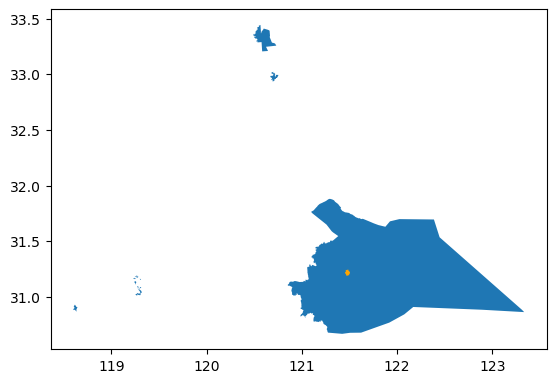

In [6]:
ax = area.plot()

district = 'Huangpu, Shanghai, China'
area_dist = ox.geocode_to_gdf(district)
area_dist.plot(ax = ax, color = 'orange')

/tmp/ipykernel_4490/723375920.py:3: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  buildings = ox.geometries_from_place(district, tags)


(5731, 107)
1006


<Axes: >

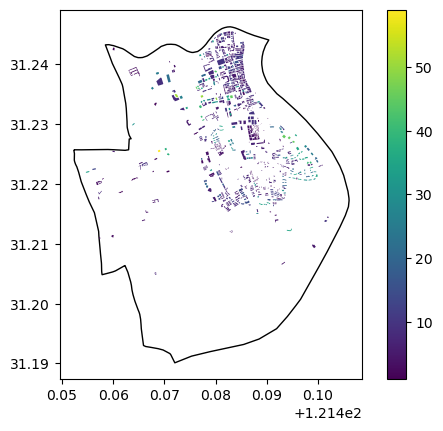

In [9]:
tags = {'building': True}   

buildings = ox.geometries_from_place(district, tags)
print(buildings.shape)
buildings['building:levels_float'] = buildings['building:levels'].astype(float)
print(buildings['building:levels_float'].count())
ax = area_dist.plot(facecolor = [0, 0, 0, 0], edgecolor = 'black')
buildings.plot(ax = ax, column = 'building:levels_float', legend=True)

In [20]:
print(f'Доля зданий с известной этажностью в районе Huangpu: {buildings['building:levels_float'].count()/len(buildings.index)}')

Доля зданий с известной этажностью в районе Huangpu: 0.1755365555749433


### Доля зданий с известной этажностью в районе Huangpu - 18%

In [23]:
buildings['height'] = buildings['height'].astype(float)
print(f'Доля зданий с известной высотой в районе Huangpu: {buildings['height'].count()/len(buildings.index)}')

Доля зданий с известной высотой в районе Huangpu: 0.004362240446693422


### Доля зданий с известной высотой в районе Huangpu - 0.4%